In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import sqrt

In [2]:
np.random.seed(1)

In [3]:
# Produce dataset
xlim = [-1, 2]
b0 = 0.6
b1 = 1.7
n = 11
x = np.linspace(xlim[0], xlim[1], n)
y = b1 * x + b0 + np.random.rand(n)

In [4]:
current_params = [2.5, -7]

In [5]:
# Init
granularity = 1000
p1lim = [-10, 10]
p2lim = [-10, 10]
p1 = np.linspace(p1lim[0], p1lim[1], granularity)
p2 = np.linspace(p2lim[0], p2lim[1], granularity)
p1p1, p2p2 = np.meshgrid(p1, p2)

In [6]:
# Calculate loss 2d
params = None

xp = np.vstack((np.ones((1, x.shape[0])), x)).T
if params is None:
    b = np.vstack((p1p1.flatten(), p2p2.flatten()))
    yp = np.dot(xp, b)
    yl = np.repeat(y, granularity * granularity) \
           .reshape(y.shape[0], granularity * granularity)
    l = np.mean(np.power(yl - yp, 2), axis = 0).reshape(granularity, granularity)
else:
    yp = np.dot(xp, params)

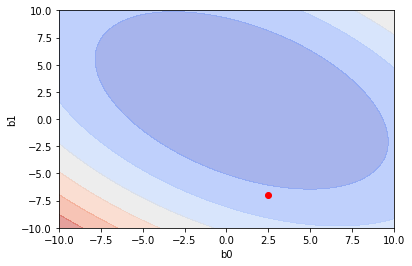

In [7]:
# plot loss 2d
fig, ax = plt.subplots()
ax.contourf(p1, p2, l, cmap = cm.coolwarm, alpha = 0.5)
ax.set_xlabel('b0')
ax.set_ylabel('b1')
plt.plot(current_params[0], current_params[1], 'ro')

In [28]:
X = np.vstack([np.ones(x.shape[0]), x]).T

In [29]:
A = np.dot(X.T, X)

In [30]:
b = np.dot(X.T, y)

In [32]:
# Testing that beta is correct
beta = np.dot(np.linalg.inv(A), b)
beta

array([0.91503294, 1.71820459])

In [62]:
# Algorithm 
w = [np.array(current_params[:])]
r = b - np.dot(A, np.array(current_params))
d = r
while True:
    r_prev = r
    s = np.dot(r.T, r) / np.dot(np.dot(d.T, A), d)
    print('prev_w = ' + str(w[-1]))
    print('s = ' + str(s))
    print('d = ' + str(d))
    w.append(list(np.array(w[-1]) + s * d)[:])
    print('w = ' + str(w[-1]))
    r = r_prev - s * d
    print('r = ' + str(r))
    beta = np.dot(r.T, r) / np.dot(r_prev.T, r_prev)
    d = r + beta * d
    print('beta = ' + str(beta))
    print('-----')

prev_w = [ 2.5 -7. ]
s = 0.06433079974333004
d = [ 30.51548759 101.56796923]
w = [4.463085721366327, -0.46605131128060506]
r = [28.55240187 95.03402054]
beta = 0.8754768523089564
-----
prev_w = [4.463085721366327, -0.46605131128060506]
s = 0.017169461369858773
d = [ 55.26800489 183.95442653]
w = [5.412007596396709, 2.692347108904791]
r = [27.60348    91.87562212]
beta = 0.9346357300638207
-----
prev_w = [5.412007596396709, 2.692347108904791]
s = 0.007802794913933175
d = [ 79.2589321  263.80600186]
w = [6.0304487886692755, 4.7507712384873315]
r = [26.9850388  89.81719799]
beta = 0.9556930307016333
-----
prev_w = [6.0304487886692755, 4.7507712384873315]
s = 0.004438655740201656
d = [102.73224783 341.93475542]
w = [6.486441870213752, 6.2685019034268805]
r = [26.52904572 88.29946732]
beta = 0.9664895499932543
-----
prev_w = [6.486441870213752, 6.2685019034268805]
s = 0.0028600385755766762
d = [125.8186897  418.77583522]
w = [6.846288176282032, 7.466216946679749]
r = [26.16919942 87.1017522

beta = 0.9992010164748113
-----
prev_w = [12.35570650043774, 25.803804675486962]
s = 2.4532225594835434e-06
d = [ 3345.54376757 11135.33203124]
w = [12.363913863882093, 25.831122123233335]
r = [20.65157373 68.7368471 ]
beta = 0.9992056321247929
-----
prev_w = [12.363913863882093, 25.831122123233335]
s = 2.4251167013030135e-06
d = [ 3363.53774881 11195.2233283 ]
w = [12.372070835452192, 25.858271846301605]
r = [20.64341676 68.70969738]
beta = 0.9992101947527591
-----
prev_w = [12.372070835452192, 25.858271846301605]
s = 2.3974910917604686e-06
d = [ 3381.5246258  11255.09097955]
w = [12.38017801061912, 25.88525582666203]
r = [20.63530958 68.6827134 ]
beta = 0.999214705267123
-----
prev_w = [12.38017801061912, 25.88525582666203]
s = 2.370334851419188e-06
d = [ 3399.50444191 11314.93512929]
w = [12.388235974475325, 25.91207601174052]
r = [20.62725162 68.65589322]
beta = 0.9992191645556651
-----
prev_w = [12.388235974475325, 25.91207601174052]
s = 2.3436374071818653e-06
d = [ 3417.47723996 

r = [19.65787861 65.42942508]
beta = 0.9996127672262918
-----
prev_w = [13.35760898710917, 29.138544145985055]
s = 5.795708759006982e-07
d = [ 6549.26927999 21798.63515807]
w = [13.361404752842285, 29.151178000057055]
r = [19.65408284 65.41679123]
beta = 0.9996138546437642
-----
prev_w = [13.361404752842285, 29.151178000057055]
s = 5.763291511507919e-07
d = [ 6566.39439291 21855.63450756]
w = [13.365189157348873, 29.163774039340655]
r = [19.65029843 65.40419519]
beta = 0.999614935971022
-----
prev_w = [13.365189157348873, 29.163774039340655]
s = 5.731145485324931e-07
d = [ 6583.51620907 21912.62288407]
w = [13.368962266268788, 29.17633248231202]
r = [19.64652533 65.39163675]
beta = 0.9996160112590857
-----
prev_w = [13.368962266268788, 29.17633248231202]
s = 5.699267663283308e-07
d = [ 6600.63473829 21969.60032034]
w = [13.372724144680898, 29.188853545580116]
r = [19.64276345 65.37911568]
beta = 0.9996170805584069
-----
prev_w = [13.372724144680898, 29.188853545580116]
s = 5.6676550700

KeyboardInterrupt: 

In [52]:
np.array(w).shape

(1093, 2)

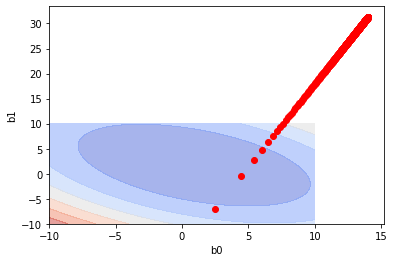

In [60]:
# plot loss 2d
fig, ax = plt.subplots()
ax.contourf(p1, p2, l, cmap = cm.coolwarm, alpha = 0.5)
ax.set_xlabel('b0')
ax.set_ylabel('b1')
plt.plot(np.array(w)[:, 0], np.array(w)[:, 1], 'ro')